In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
import scipy.sparse
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import recall_score, confusion_matrix, make_scorer
import pickle

### Random Forest hyperparameters

In [2]:
params = {
    'max_depth':[1,2,5,10,15],
    'n_estimators':[10,30,100],
    'class_weight': ['balanced'],
    'max_features':[None],
    'random_state': [42],
    'n_jobs':[-1],
    'verbose':[1]
}

### Import data

In [3]:
print('Importing data...')
data_path = r'data/clean_df.csv.gz'
df = pd.read_csv(data_path)
print('Done.')

print('Engineering features...')
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])

df['CASUALTIES?'] = 0
mask = df['TOTAL PEDESTRIAN CASUALTIES'] != 0
df.loc[mask, 'CASUALTIES?'] = 1
df.loc[df['TOTAL PEDESTRIAN CASUALTIES'] != 1, ['TOTAL PEDESTRIAN CASUALTIES','CASUALTIES?']].sample(5)
print('Done.')

Importing data...
Done.
Engineering features...
Done.


### K-Means analysis

Manhattan K-Means analysis
# Clusters: 2
    Recall score: 0.6679374761723218
# Clusters: 3
    Recall score: 0.6135468293302834
# Clusters: 4
    Recall score: 0.5411106875079426
# Clusters: 5
    Recall score: 0.44275003177023764
# Clusters: 6
    Recall score: 0.6418858813063921
# Clusters: 7
    Recall score: 0.546956411233956
# Clusters: 8
    Recall score: 0.4883720930232558
# Clusters: 9
    Recall score: 0.27500317702376414
# Clusters: 10
    Recall score: 0.46905578853729823
# Clusters: 11
    Recall score: 0.5376795018426738
# Clusters: 12
    Recall score: 0.4123776845850807
# Clusters: 13
    Recall score: 0.4671495742788156
# Clusters: 14
    Recall score: 0.44567289363324436
# Clusters: 15
    Recall score: 0.435125174736307
# Clusters: 16
    Recall score: 0.43194815097216926
# Clusters: 17
    Recall score: 0.3447706188842293
# Clusters: 18
    Recall score: 0.3217689668318719
# Clusters: 19
    Recall score: 0.3104587622315415
# Clusters: 20
    Recall score: 0.4100902

<ipython-input-4-bc847b120132>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    Recall score: 0.7040302267002518
# Clusters: 3
    Recall score: 0.8110831234256927
# Clusters: 4
    Recall score: 0.6662468513853904
# Clusters: 5
    Recall score: 0.5289672544080605
# Clusters: 6
    Recall score: 0.3904282115869018
# Clusters: 7
    Recall score: 0.3778337531486146
# Clusters: 8
    Recall score: 0.3677581863979849
# Clusters: 9
    Recall score: 0.5050377833753149
# Clusters: 10
    Recall score: 0.3198992443324937
# Clusters: 11
    Recall score: 0.41309823677581864
# Clusters: 12
    Recall score: 0.4282115869017632
# Clusters: 13
    Recall score: 0.41309823677581864
# Clusters: 14
    Recall score: 0.4508816120906801
# Clusters: 15
    Recall score: 0.44836272040302266
# Clusters: 16
    Recall score: 0.4445843828715365
# Clusters: 17
    Recall score: 0.47732997481108314
# Clusters: 18
    Recall score: 0.4836272040302267
# Clusters: 19
    Recall score: 0.44836272040302266
# Clusters: 20
    Recall score: 0.6020151133501259
Queens K-Means 

<ipython-input-4-bc847b120132>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    Recall score: 0.5736423087858971
# Clusters: 3
    Recall score: 0.3864088711970429
# Clusters: 4
    Recall score: 0.3729030423656525
# Clusters: 5
    Recall score: 0.5671026442991186
# Clusters: 6
    Recall score: 0.5992323002558999
# Clusters: 7
    Recall score: 0.48521467159510945
# Clusters: 8
    Recall score: 0.4694341768552744
# Clusters: 9
    Recall score: 0.47028717657094116
# Clusters: 10
    Recall score: 0.5860108046630651
# Clusters: 11
    Recall score: 0.56056297981234
# Clusters: 12
    Recall score: 0.6815467728177423
# Clusters: 13
    Recall score: 0.8110605629798123
# Clusters: 14
    Recall score: 0.7142450952516349
# Clusters: 15
    Recall score: 0.7395507534830822
# Clusters: 16
    Recall score: 0.6053454648848451
# Clusters: 17
    Recall score: 0.5999431333522889
# Clusters: 18
    Recall score: 0.5723628092123969
# Clusters: 19
    Recall score: 0.5506113164628945
# Clusters: 20
    Recall score: 0.5747796417401194
Bronx K-Means analys

<ipython-input-4-bc847b120132>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    Recall score: 0.6439684329199549
# Clusters: 3
    Recall score: 0.7878241262683202
# Clusters: 4
    Recall score: 0.6498308906426156
# Clusters: 5
    Recall score: 0.5632468996617813
# Clusters: 6
    Recall score: 0.5821871476888388
# Clusters: 7
    Recall score: 0.561217587373168
# Clusters: 8
    Recall score: 0.6489289740698986
# Clusters: 9
    Recall score: 0.4793686583990981
# Clusters: 10
    Recall score: 0.47170236753100336
# Clusters: 11
    Recall score: 0.5585118376550169
# Clusters: 12
    Recall score: 0.5323562570462232
# Clusters: 13
    Recall score: 0.5449830890642615
# Clusters: 14
    Recall score: 0.44419391206313413
# Clusters: 15
    Recall score: 0.4926719278466742
# Clusters: 16
    Recall score: 0.4985343855693348
# Clusters: 17
    Recall score: 0.5429537767756483
# Clusters: 18
    Recall score: 0.5409244644870349
# Clusters: 19
    Recall score: 0.5760992108229989
# Clusters: 20
    Recall score: 0.42818489289740697


<ipython-input-4-bc847b120132>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


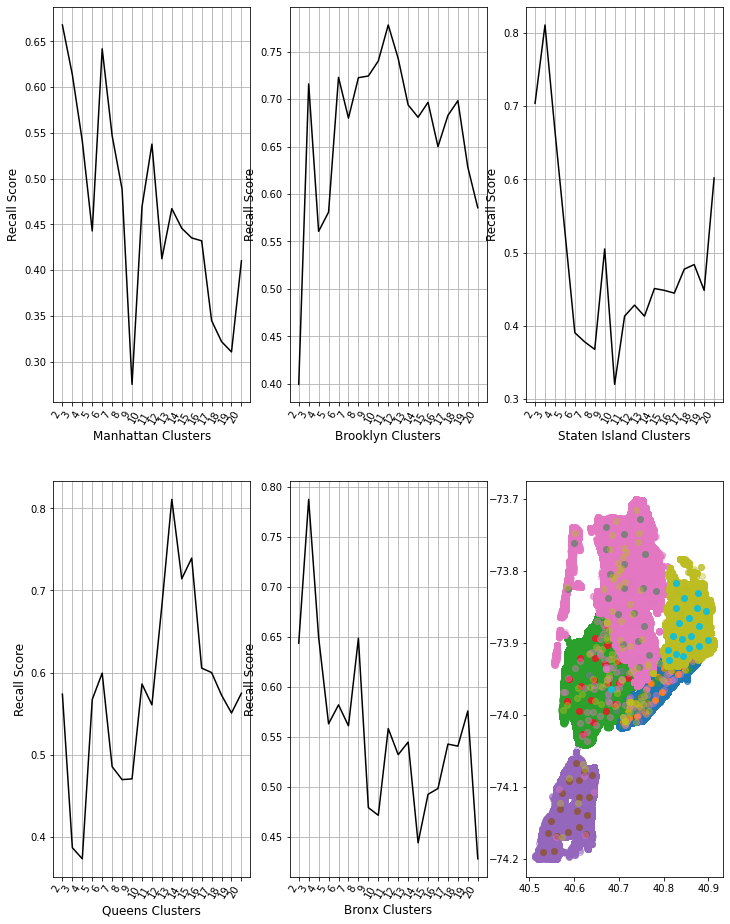

In [4]:
boroughs = ['MANHATTAN','BROOKLYN','STATEN ISLAND','QUEENS','BRONX']
subplots = [231,232,233,234,235]
_ = plt.figure(figsize=(12,16))
max_k = {}
for space, current_borough in zip(subplots, boroughs):
    print(f'{current_borough.title()} K-Means analysis')
    borough = df[df['BOROUGH'] == current_borough]
    recall_list = []
    for i in range(2,21):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(borough[['LATITUDE','LONGITUDE']].values)
        df_clusters = pd.Series(kmeans.labels_)
        cluster_dummies = pd.get_dummies(df_clusters)
        X = scipy.sparse.csr_matrix(cluster_dummies)
        y = borough['CASUALTIES?']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        log_reg = LogisticRegression(class_weight='balanced', max_iter=10_000)
        log_reg.fit(X_train, y_train)
        y_pred = log_reg.predict(X_test)
        log_recall = recall_score(y_test, y_pred)
        print(f'# Clusters: {i}\n    Recall score: {log_recall}')
        recall_list.append(log_recall)
    _ = plt.subplot(space)
    _ = plt.plot(range(2,21), recall_list, 'k-')
    _ = plt.grid()
    _ = plt.xlabel(f'{current_borough.title()} Clusters', fontsize=12)
    _ = plt.ylabel('Recall Score', fontsize=12)
    _ = plt.xticks(range(2,21), rotation=60, ha='right')
    max_k[current_borough] = {
                        'K':recall_list.index(max(recall_list))+2,
                        'Score': max(recall_list)
            }
    _ = plt.subplot(236)
    _ = plt.scatter(borough['LATITUDE'], borough['LONGITUDE'], alpha=0.4)
    _ = plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])

In [5]:
_ = plt.savefig('K-Means tuning.png')
for i in max_k:
    print(f'{i}\n    {max_k[i]}')

MANHATTAN
    {'K': 2, 'Score': 0.6679374761723218}
BROOKLYN
    {'K': 11, 'Score': 0.7782504653017814}
STATEN ISLAND
    {'K': 3, 'Score': 0.8110831234256927}
QUEENS
    {'K': 13, 'Score': 0.8110605629798123}
BRONX
    {'K': 3, 'Score': 0.7878241262683202}


<Figure size 432x288 with 0 Axes>

### Fit clusters

In [6]:
print('Fitting K-means clusters...')
k_clusters = []
for i in max_k:
    k_clusters.append(max_k[i]['K'])
for n, borough in zip(k_clusters,boroughs):
    print(f'    Calculating {borough.title()} clusters...')
    
    borough_accidents = df[df['BOROUGH'] == borough]
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(borough_accidents[['LATITUDE','LONGITUDE']].values)
    
    df.loc[df['BOROUGH'] == borough, f'{borough} CLUSTERS'] = kmeans.labels_
print('Done.')

Fitting K-means clusters...
    Calculating Manhattan clusters...
    Calculating Brooklyn clusters...
    Calculating Staten Island clusters...
    Calculating Queens clusters...
    Calculating Bronx clusters...
Done.


### Create feature set

In [7]:
print('Creating feature set...')
borough_dummies = pd.get_dummies(df['BOROUGH'], sparse=True)
borough_clusters = [borough+' CLUSTERS' for borough in boroughs]
cluster_dummies = pd.get_dummies(df[borough_clusters].fillna(''), prefix='CLUSTER', sparse=True)
pre_X = cluster_dummies.join(borough_dummies)
print('Done.')

Creating feature set...
Done.


### Split data

In [8]:
print('Splitting data...')
X = scipy.sparse.csr_matrix(pre_X)
y = df['CASUALTIES?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Done.')

Splitting data...
Done.


### Random Forest grid search

In [9]:
cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, scoring=make_scorer(recall_score), n_jobs=-1, return_train_score=True)
cv.fit(X_train, y_train)

cv_results = pd.DataFrame(cv.cv_results_)
cv_results[['param_max_depth','param_n_estimators','mean_train_score','mean_test_score','mean_fit_time']].sort_values(by='mean_test_score', ascending=False)

print(f'{cv.best_params_}\n{cv.best_score_}')

/home/yehuda/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


{'class_weight': 'balanced', 'max_depth': 2, 'max_features': None, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 42, 'verbose': 1}
0.7869431742894939


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.1s finished


### Random Forest best params

In [10]:
rf_clf = RandomForestClassifier(**cv.best_params_)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print(cv.best_params_)
print(recall_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


{'class_weight': 'balanced', 'max_depth': 2, 'max_features': None, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 42, 'verbose': 1}
0.787579415501906


[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.1s finished


In [12]:
params_path = r'Predictor tools/rf_params.pickle'
with open(params_path, 'wb') as file:
    pickle.dump(cv.best_params_, file)
    
with open(params_path, 'rb') as file:
    test = pickle.load(file)
    
test == cv.best_params_

True

In [13]:
params_path = r'Predictor tools/k_clusters.pickle'
with open(params_path, 'wb') as file:
    pickle.dump(max_k, file)
    
with open(params_path, 'rb') as file:
    test = pickle.load(file)

test == max_k

True